In [10]:
import numpy as np
import matplotlib.pyplot as plt

# I tempi a cui vengono fatte le misure in secondi. Circa 2000 misure ogni 120 secondi 
timepoints = np.linspace(1,1000.,1000)*120
print(timepoints[0:3])
print(timepoints[-4:])

[120. 240. 360.]
[119640. 119760. 119880. 120000.]


In [11]:
# Misure previste se il numero di decadimenti è D(t) = N0*exp(t/tau)/tau
N0 = 1.e14
tau = 3000.
datapoints = np.exp(-timepoints/tau)*N0/tau

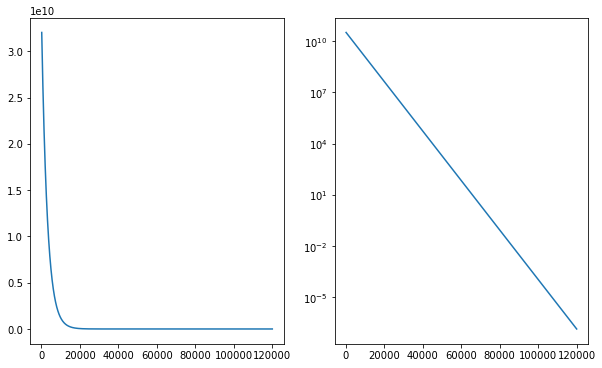

In [12]:
# Plot
fig0,ax0 = plt.subplots(ncols=2, figsize=(10,6))
ax0[0].plot(timepoints,datapoints)
ax0[1].set_yscale('log')
ax0[1].plot(timepoints,datapoints)

In [13]:
# Aggiungiamo rumore. In ogni punto il rumore è composto da un termine distribuito uniformemente 
# in un intervallo del 10% attorno alla misura.
noise = (np.random.random_sample(size=len(timepoints))-0.5)/10
datapoints = datapoints*(1.+noise)
# Converiamo i dati in interi
datapoints = np.around(datapoints)
print(datapoints[:10])
print(datapoints[-10:])

[3.15186053e+10 2.93376640e+10 3.04481552e+10 2.91939068e+10
 2.81835038e+10 2.60850878e+10 2.41144719e+10 2.50465395e+10
 2.21684456e+10 2.29978887e+10]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


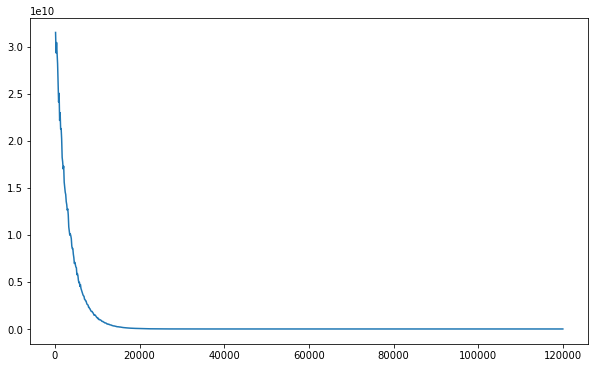

In [14]:
fig1,ax1 = plt.subplots(figsize=(10,6))
ax1.plot(timepoints,datapoints)

In [15]:
out_file = open("decay_data.txt", "w")
for i in range(len(timepoints)):
    out_file.write(f"{timepoints[i]:12.1f}   {datapoints[i]:15.1f}\n")
out_file.close()

#### Warning
curve-fit non riesce a gestire i dati precedenti.

In [27]:
# I tempi a cui vengono fatte le misure in secondi. Circa 2000 misure ogni 120 secondi 
timepoints = np.linspace(1,100.,50)
print(timepoints[0:3])
print(timepoints[-4:])

[1.         3.02040816 5.04081633]
[ 93.93877551  95.95918367  97.97959184 100.        ]


In [28]:
N0 = 1.e4
tau = 30.
datapoints = np.exp(-timepoints/tau)*N0/tau
# Aggiungiamo rumore. In ogni punto il rumore è composto da un termine distribuito uniformemente 
# in un intervallo del 10% attorno alla misura.
noise = (np.random.random_sample(size=len(timepoints))-0.5)/10
datapoints = datapoints*(1.+noise)
# Converiamo i dati in interi
datapoints = np.around(datapoints)

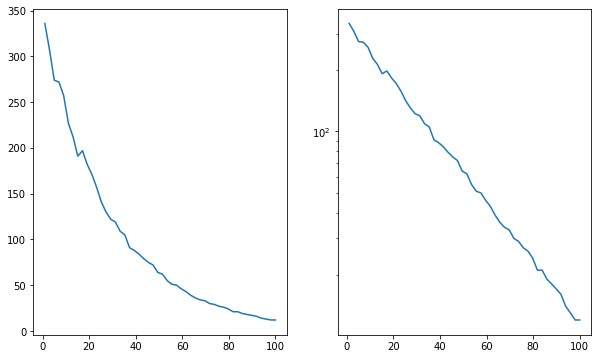

In [29]:
# Plot
fig0,ax0 = plt.subplots(ncols=2, figsize=(10,6))
ax0[0].plot(timepoints,datapoints)
ax0[1].set_yscale('log')
ax0[1].plot(timepoints,datapoints)

Test

In [30]:
def f1(x, N_over_lam, inv_lam):
    """Fit function y=f(x,p) with parameters p=(N,lam). """
    return N_over_lam * np.exp(- x*inv_lam)

In [31]:
print(timepoints)
print(datapoints)

[  1.           3.02040816   5.04081633   7.06122449   9.08163265
  11.10204082  13.12244898  15.14285714  17.16326531  19.18367347
  21.20408163  23.2244898   25.24489796  27.26530612  29.28571429
  31.30612245  33.32653061  35.34693878  37.36734694  39.3877551
  41.40816327  43.42857143  45.44897959  47.46938776  49.48979592
  51.51020408  53.53061224  55.55102041  57.57142857  59.59183673
  61.6122449   63.63265306  65.65306122  67.67346939  69.69387755
  71.71428571  73.73469388  75.75510204  77.7755102   79.79591837
  81.81632653  83.83673469  85.85714286  87.87755102  89.89795918
  91.91836735  93.93877551  95.95918367  97.97959184 100.        ]
[336. 307. 274. 272. 257. 227. 212. 191. 197. 182. 171. 157. 141. 130.
 122. 119. 109. 105.  91.  88.  84.  79.  75.  72.  64.  62.  55.  51.
  50.  46.  43.  39.  36.  34.  33.  30.  29.  27.  26.  24.  21.  21.
  19.  18.  17.  16.  14.  13.  12.  12.]


In [32]:
from scipy.optimize import curve_fit
popt1, pcov1 = curve_fit(f1, timepoints,datapoints)
N_over_tau1, inv_tau1 = popt1
print(f"Optimal parameters are N0/tau={N_over_tau1:e}, 1/tau={inv_tau1:e}.")

<ipython-input-30-450ae7b5d7f5>:3: RuntimeWarning: overflow encountered in exp
  return N_over_lam * np.exp(- x*inv_lam)


NameError: name 'N_over_tau' is not defined

Fit the log of the data

In [34]:
def f2(x, N_over_lam_log, inv_lam):
    return N_over_lam_log - x*inv_lam

datapoints_log = np.log(datapoints)
popt1, pcov1 = curve_fit(f2, timepoints,datapoints_log)
N_over_tau1_log, inv_tau1 = popt1
print(f"Optimal parameters are log(N0/tau)={N_over_tau1_log:e}, 1/tau={inv_tau1:e}.")

Optimal parameters are log(N0/tau)=5.818849e+00, 1/tau=3.349831e-02.


In [36]:
# best fit curve
yfitted = np.exp(f2(timepoints,N_over_tau1_log, inv_tau1))

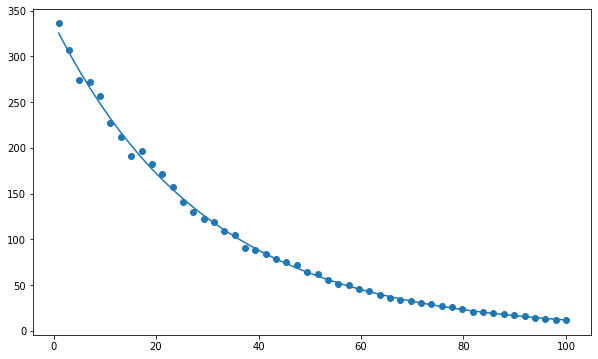

In [37]:
fig1,ax1 = plt.subplots(figsize=(10,6))
ax1.scatter(timepoints,datapoints)
ax1.plot(timepoints,yfitted)